# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
import os
from random import choice
import gc

import warnings; warnings.filterwarnings('ignore')

from cycler import cycler
from colorama import Style, Fore
from IPython.display import display

sys.path.append('..')

from config import CFG
from src.visuals.dataframe_styling import magnify, stylize_describe, stylize_simple
from src.visuals.plotting import plot_time_series, plot_count

CFG = CFG()

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', CFG.NCOLS)
pd.set_option('display.max_rows', CFG.NROWS)

# Visuals Configurations

In [3]:
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
grn = Style.BRIGHT + Fore.GREEN
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

palette = ['#3c3744', '#048BA8', '#EE6352', '#E1BB80', '#78BC61']
grey_palette = ['#8e8e93', '#636366', '#48484a', '#3a3a3c', '#2c2c2e', '#1c1c27']
bg_color = '#F6F5F5'
white_color = '#d1d1d6'

custom_params = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.left': False,
    'grid.alpha':0.2,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'large',
    'axes.labelsize': 'large',
    'ytick.labelsize': 'medium',
    'xtick.labelsize': 'medium',
    'legend.fontsize': 'large',
    'lines.linewidth': 1,
    'axes.prop_cycle': cycler('color',palette),
    'figure.facecolor': bg_color,
    'figure.edgecolor': bg_color,
    'axes.facecolor': bg_color,
    'text.color':grey_palette[1],
    'axes.labelcolor':grey_palette[1],
    'axes.edgecolor':grey_palette[1],
    'xtick.color':grey_palette[1],
    'ytick.color':grey_palette[1],
    'figure.dpi':150,
}
sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette),
    rc=custom_params)

display(sns.color_palette(palette))
display(sns.color_palette(grey_palette))
display(sns.color_palette([bg_color, white_color]))

[(0.23529411764705882, 0.21568627450980393, 0.26666666666666666),
 (0.01568627450980392, 0.5450980392156862, 0.6588235294117647),
 (0.9333333333333333, 0.38823529411764707, 0.3215686274509804),
 (0.8823529411764706, 0.7333333333333333, 0.5019607843137255),
 (0.47058823529411764, 0.7372549019607844, 0.3803921568627451)]

[(0.5568627450980392, 0.5568627450980392, 0.5764705882352941),
 (0.38823529411764707, 0.38823529411764707, 0.4),
 (0.2823529411764706, 0.2823529411764706, 0.2901960784313726),
 (0.22745098039215686, 0.22745098039215686, 0.23529411764705882),
 (0.17254901960784313, 0.17254901960784313, 0.1803921568627451),
 (0.10980392156862745, 0.10980392156862745, 0.15294117647058825)]

[(0.9647058823529412, 0.9607843137254902, 0.9607843137254902),
 (0.8196078431372549, 0.8196078431372549, 0.8392156862745098)]

# Data Exploration

## Metadata Files

### tdcsfog Metadata

- Identifies each series in the tdcsfog dataset by a unique Subject, Visit, Test, Medication condition.
  - Visit Lab visits consist of a baseline assessment, two post-treatment assessments for different treatment stages, and one follow-up assessment.
  - Test Which of three test types was performed, with 3 the most challenging.
  - Medication Subjects may have been either off or on anti-parkinsonian medication during the recording.

In [21]:
tdcsfog_meta = pd.read_csv(f'{CFG.DATA_PATH}/tdcsfog_metadata.csv')

print(f'\t{gld}Shape of tdcsfog metadata \t --> \t {red}{tdcsfog_meta.shape}{res}')
display(stylize_simple(tdcsfog_meta.head(5), 'tdcsfog metadata, top 5 rows (hover to magnify)'))
display(stylize_describe(tdcsfog_meta, dataset_name='tdcsfog metadata'))

print(f'\t{gld}Number of unique subjects \t --> \t {red}{tdcsfog_meta["Subject"].nunique()}{res}')

subject_example = tdcsfog_meta.loc[tdcsfog_meta.sample(1).index, 'Subject'].values[0]
subject_example_df = tdcsfog_meta[tdcsfog_meta['Subject'] == subject_example]
display(stylize_simple(subject_example_df.head(10), 'top 10 rows of a singular subject ID (hover to magnify)'))

print(f'\t{gld}Number of unique ids \t --> \t {red}{tdcsfog_meta["Id"].nunique()}{res}')

id_example = tdcsfog_meta.loc[tdcsfog_meta.sample(1).index, 'Id'].values[0]
id_example_df = tdcsfog_meta[tdcsfog_meta['Id'] == id_example]
display(stylize_simple(id_example_df.head(10), 'top 10 rows of a singular id (hover to magnify)'))

	Shape of tdcsfog metadata 	 --> 	 (833, 5)


,Id,Subject,Visit,Test,Medication
0,003f117e14,13abfd,3,2,on
1,009ee11563,d81e3a,4,2,on
2,011322847a,203e85,2,2,on
3,01d0fe7266,203e85,2,1,off
4,024418ba39,cecfb8,19,3,on


,count,mean,std,min,25%,50%,75%,max,NaN count
Visit,833,6.461,6.172,2.000,2.000,4.000,5.000,20.000,0.000
Test,833,1.975,0.813,1.000,1.000,2.000,3.000,3.000,0.000


	Number of unique subjects 	 --> 	 62


,Id,Subject,Visit,Test,Medication
10,03bb0c0c46,cefebe,3,1,on
17,0506d9a39f,cefebe,4,1,on
82,1617d7c323,cefebe,2,2,on
100,1bb76b9425,cefebe,4,2,off
127,263f86b1d5,cefebe,4,3,on
309,616371ed4d,cefebe,3,3,off
342,71bc892dd5,cefebe,2,3,off
372,7ce3dab2ca,cefebe,2,1,off
402,83ce03ef33,cefebe,2,2,off
408,860f97c462,cefebe,2,3,on


	Number of unique ids 	 --> 	 833


,Id,Subject,Visit,Test,Medication
712,dabcdeffef,5ec437,4,1,on


#### Bar Plots

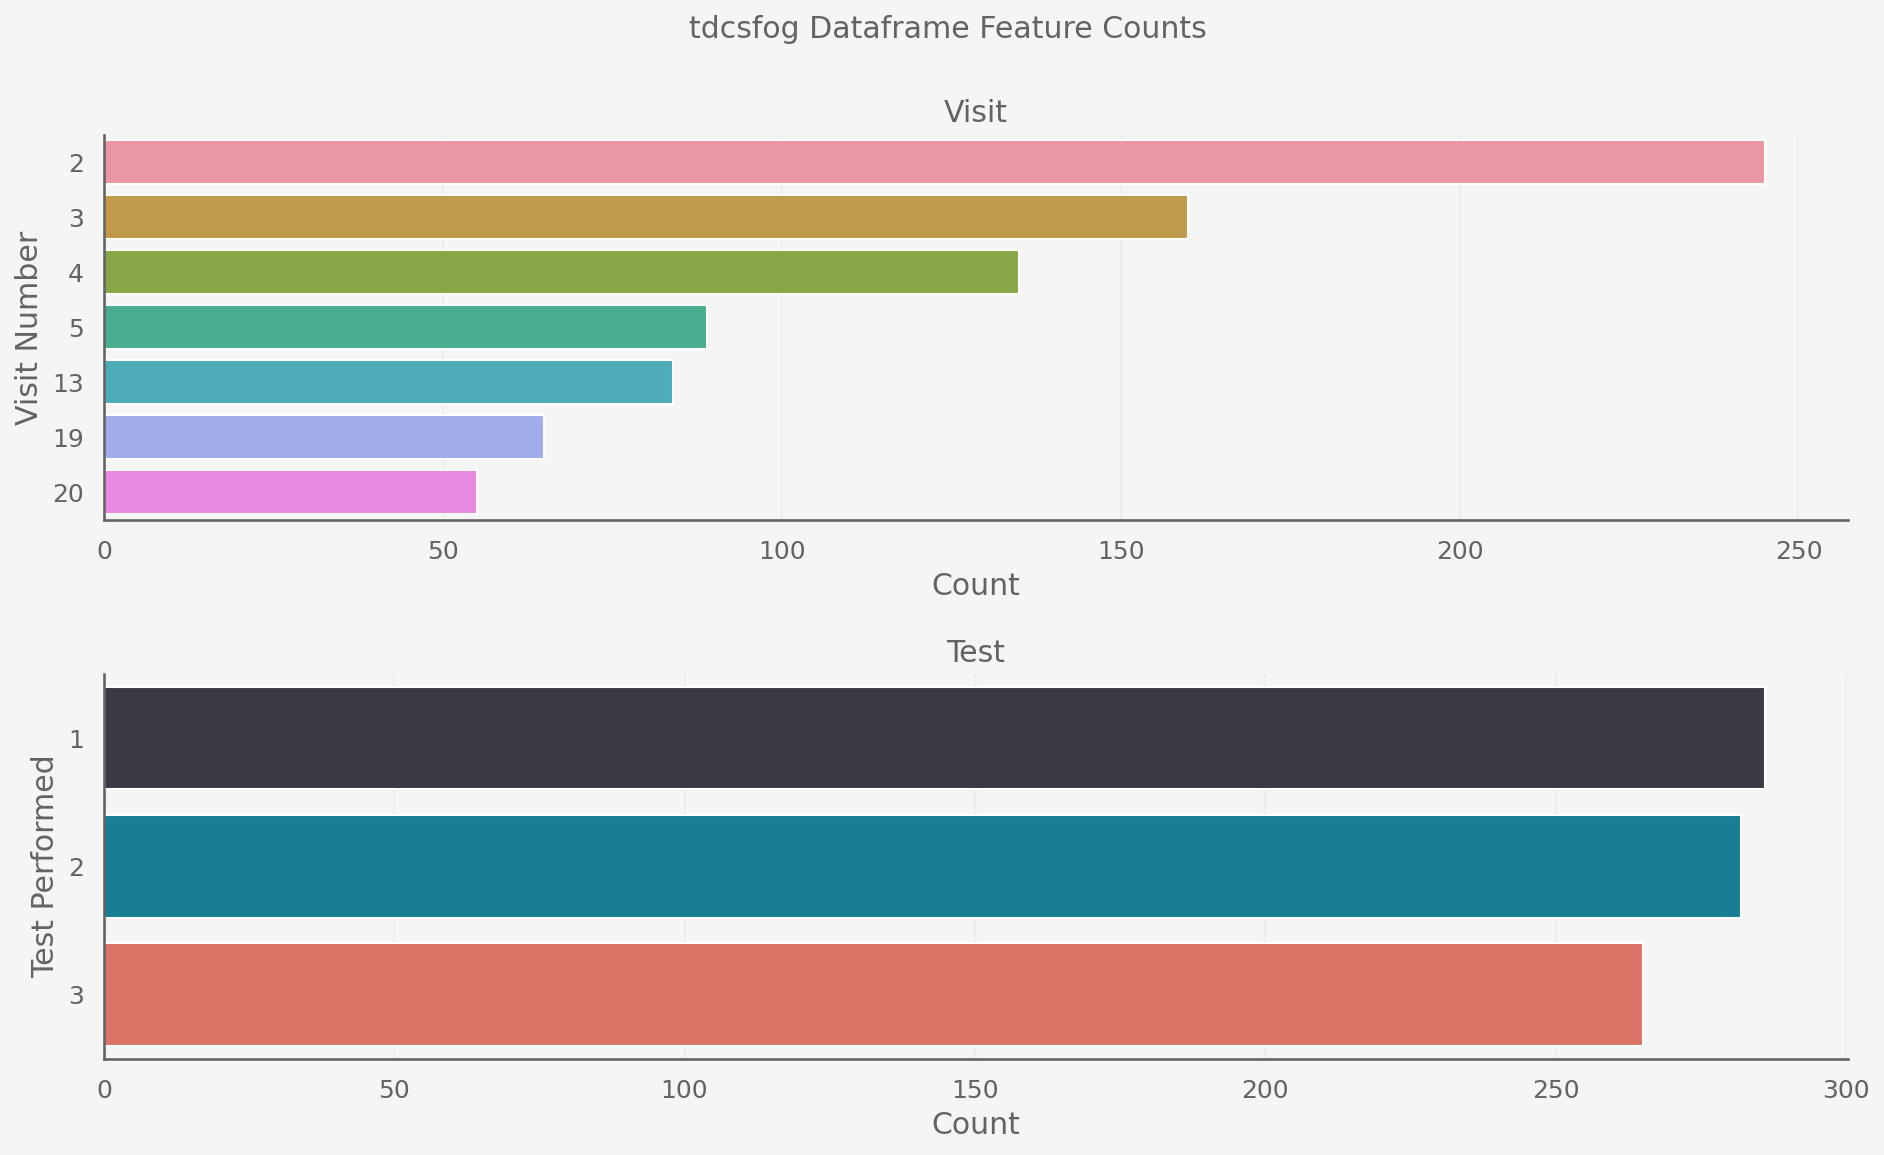

In [6]:
tdcsfog_meta_visit_counts = tdcsfog_meta['Visit'].value_counts()
tdcsfog_meta_test_counts = tdcsfog_meta['Test'].value_counts()

features = [tdcsfog_meta_visit_counts, tdcsfog_meta_test_counts]

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

sns.barplot(y=tdcsfog_meta_visit_counts.index, x=tdcsfog_meta_visit_counts.values, ax=axes[0], orient='h')
axes[0].set_title('Visit')
axes[0].set_ylabel('Visit Number')

sns.barplot(y=tdcsfog_meta_test_counts.index, x=tdcsfog_meta_test_counts.values, ax=axes[1], orient='h')
axes[1].set_title('Test')
axes[1].set_ylabel('Test Performed')

for ax in axes:
    ax.spines['left'].set_visible(True)
    ax.set_xlabel('Count')

plt.suptitle('tdcsfog Dataframe Feature Counts')
if CFG.SAVEFIG:
    plt.savefig('../data/images/tdcsfog_metadata_barplots.png')
plt.subplots_adjust(hspace=0.4)

#### Medication Pie Chart

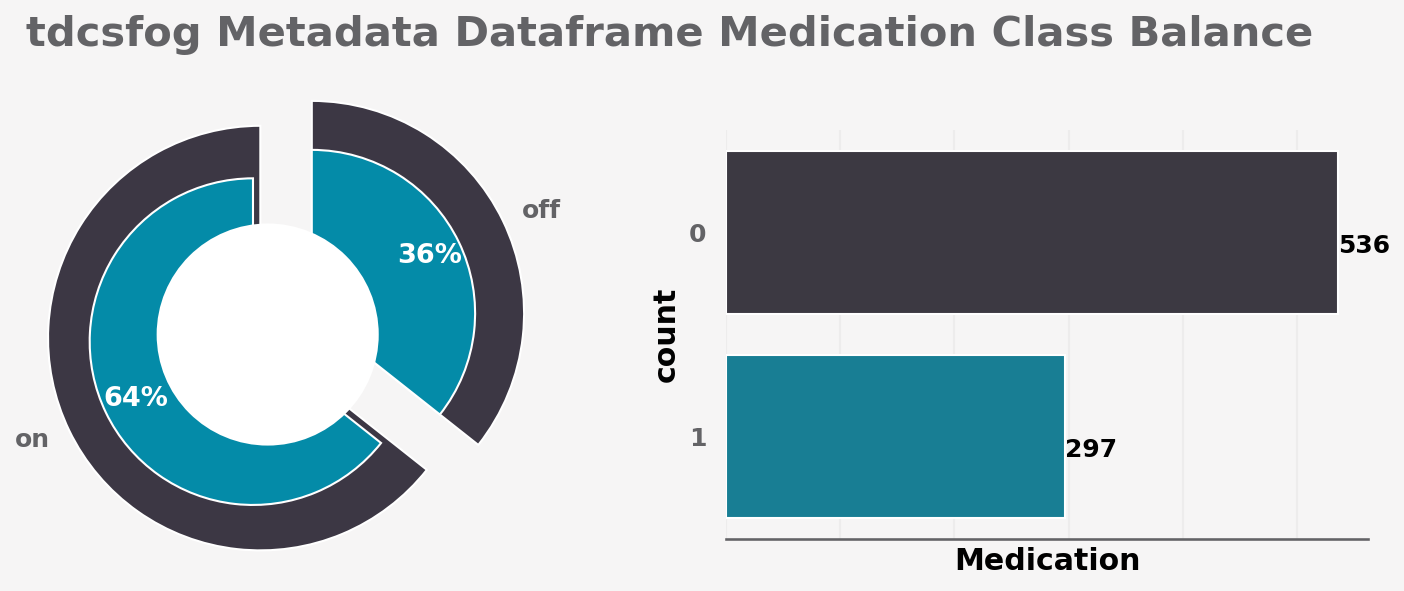

In [7]:
plot_count(tdcsfog_meta, 'Medication', 'tdcsfog Metadata Dataframe Medication Class Balance', savefig=CFG.SAVEFIG)

### defog Metadata

- Identifies each series in the defog dataset by a unique Subject, Visit, Medication condition.

In [22]:
defog_metadata = pd.read_csv(f'{CFG.DATA_PATH}/defog_metadata.csv')

print(f'\t{gld}Shape of defog metadata \t --> \t {red}{defog_metadata.shape}{res}')
display(stylize_simple(defog_metadata.head(5), 'defog metadata, top 5 rows (hover to magnify)'))
display(stylize_describe(defog_metadata, dataset_name='defog metadata'))

print(f'\t{gld}Number of unique subjects \t --> \t {red}{defog_metadata["Subject"].nunique()}{res}')

subject_example = defog_metadata.loc[defog_metadata.sample(1).index, 'Subject'].values[0]
subject_example_df = defog_metadata[defog_metadata['Subject'] == subject_example]
display(stylize_simple(subject_example_df.head(10), 'top 10 rows of a singular subject ID (hover to magnify)'))

print(f'\t{gld}Number of unique ids \t --> \t {red}{defog_metadata["Id"].nunique()}{res}')

id_example = defog_metadata.loc[defog_metadata.sample(1).index, 'Id'].values[0]
id_example_df = defog_metadata[defog_metadata['Id'] == id_example]
display(stylize_simple(id_example_df.head(10), 'top 10 rows of a singular id (hover to magnify)'))

	Shape of defog metadata 	 --> 	 (137, 4)


,Id,Subject,Visit,Medication
0,02ab235146,ab54e1,2,on
1,02ea782681,bf608b,2,on
2,06414383cf,c0b71e,2,off
3,092b4c1819,b6a627,1,off
4,0a900ed8a2,b7bd52,2,on


,count,mean,std,min,25%,50%,75%,max,NaN count
Visit,137,1.489,0.502,1.000,1.000,1.000,2.000,2.000,0.000


	Number of unique subjects 	 --> 	 45


,Id,Subject,Visit,Medication
108,be15a0d6c5,fe5d84,1,on
112,c7f06a72e7,fe5d84,2,on
119,daa4d27db4,fe5d84,1,off
135,f9efef91fb,fe5d84,2,off


	Number of unique ids 	 --> 	 137


,Id,Subject,Visit,Medication
62,6a886a3bb8,6ec6ba,1,on


#### Pie Charts

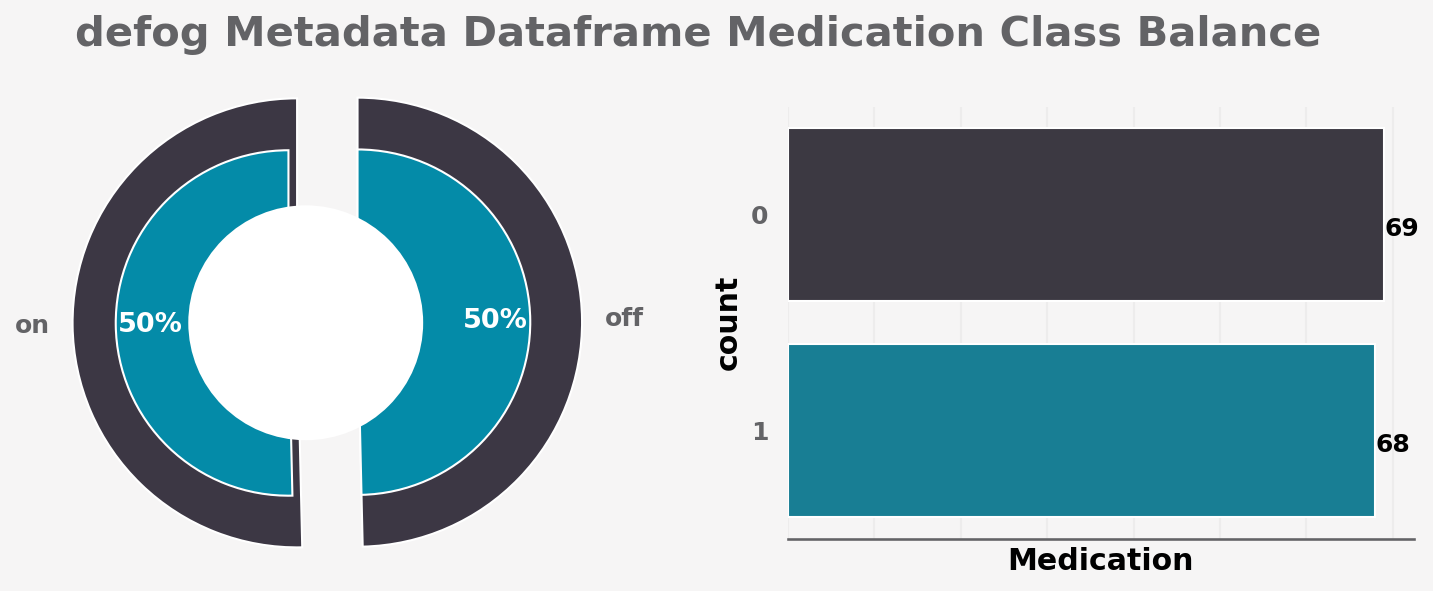

None

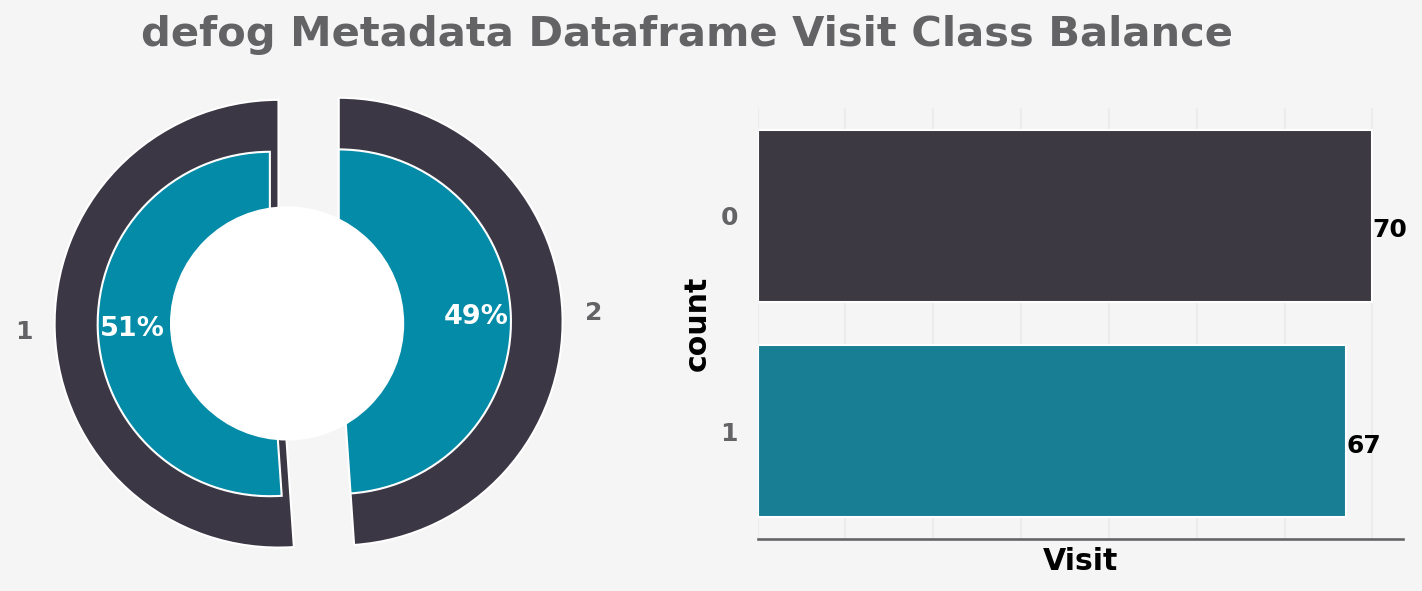

None

In [9]:
display(plot_count(defog_metadata, 'Medication', 'defog Metadata Dataframe Medication Class Balance', savefig=CFG.SAVEFIG))
display(plot_count(defog_metadata, 'Visit', 'defog Metadata Dataframe Visit Class Balance', savefig=CFG.SAVEFIG))

### Daily Metadata

- Each series in the daily dataset is identified by the Subject id. This file also contains the time of day the recording began.

In [23]:
daily_metadata = pd.read_csv(f'{CFG.DATA_PATH}/daily_metadata.csv')

print(f'\t{gld}Shape of daily metadata \t --> \t {red}{daily_metadata.shape}{res}')
display(stylize_simple(daily_metadata.head(5), 'daily metadata, top 5 rows (hover to magnify)'))
display(stylize_describe(daily_metadata, dataset_name='daily metadata'))

print(f'\t{gld}Number of unique subjects \t --> \t {red}{daily_metadata["Subject"].nunique()}{res}')

subject_example = daily_metadata.loc[daily_metadata.sample(1).index, 'Subject'].values[0]
subject_example_df = daily_metadata[daily_metadata['Subject'] == subject_example]
display(stylize_simple(subject_example_df.head(10), 'top 10 rows of a singular subject ID (hover to magnify)'))

print(f'\t{gld}Number of unique ids \t --> \t {red}{daily_metadata["Id"].nunique()}{res}')

id_example = daily_metadata.loc[daily_metadata.sample(1).index, 'Id'].values[0]
id_example_df = daily_metadata[daily_metadata['Id'] == id_example]
display(stylize_simple(id_example_df.head(10), 'top 10 rows of a singular id (hover to magnify)'))

	Shape of daily metadata 	 --> 	 (65, 4)


,Id,Subject,Visit,Beginning of recording [00:00-23:59]
0,00c4c9313d,3d8b73,1,10:19
1,07a96f89ec,a15b56,1,07:30
2,0d1bc672a8,21e523,2,08:30
3,0e333c9833,b068a2,1,11:30
4,164adaed7b,ffa798,1,13:00


,count,mean,std,min,25%,50%,75%,max,NaN count
Visit,65,1.092,0.292,1.000,1.000,1.000,1.000,2.000,0.000


	Number of unique subjects 	 --> 	 65


,Id,Subject,Visit,Beginning of recording [00:00-23:59]
45,b18354d4aa,b5c808,1,08:00


	Number of unique ids 	 --> 	 65


,Id,Subject,Visit,Beginning of recording [00:00-23:59]
18,40bf6c162f,901f3c,1,16:00


#### Pie Chart

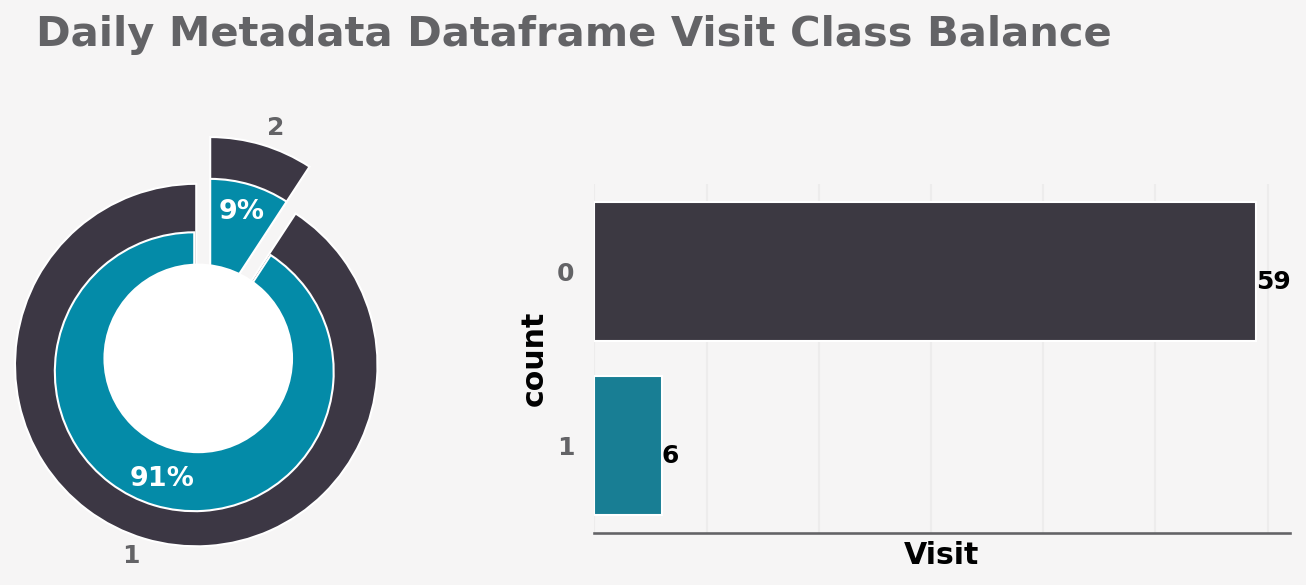

In [11]:
plot_count(daily_metadata, 'Visit', 'Daily Metadata Dataframe Visit Class Balance', savefig=CFG.SAVEFIG)

#### Bar Chart

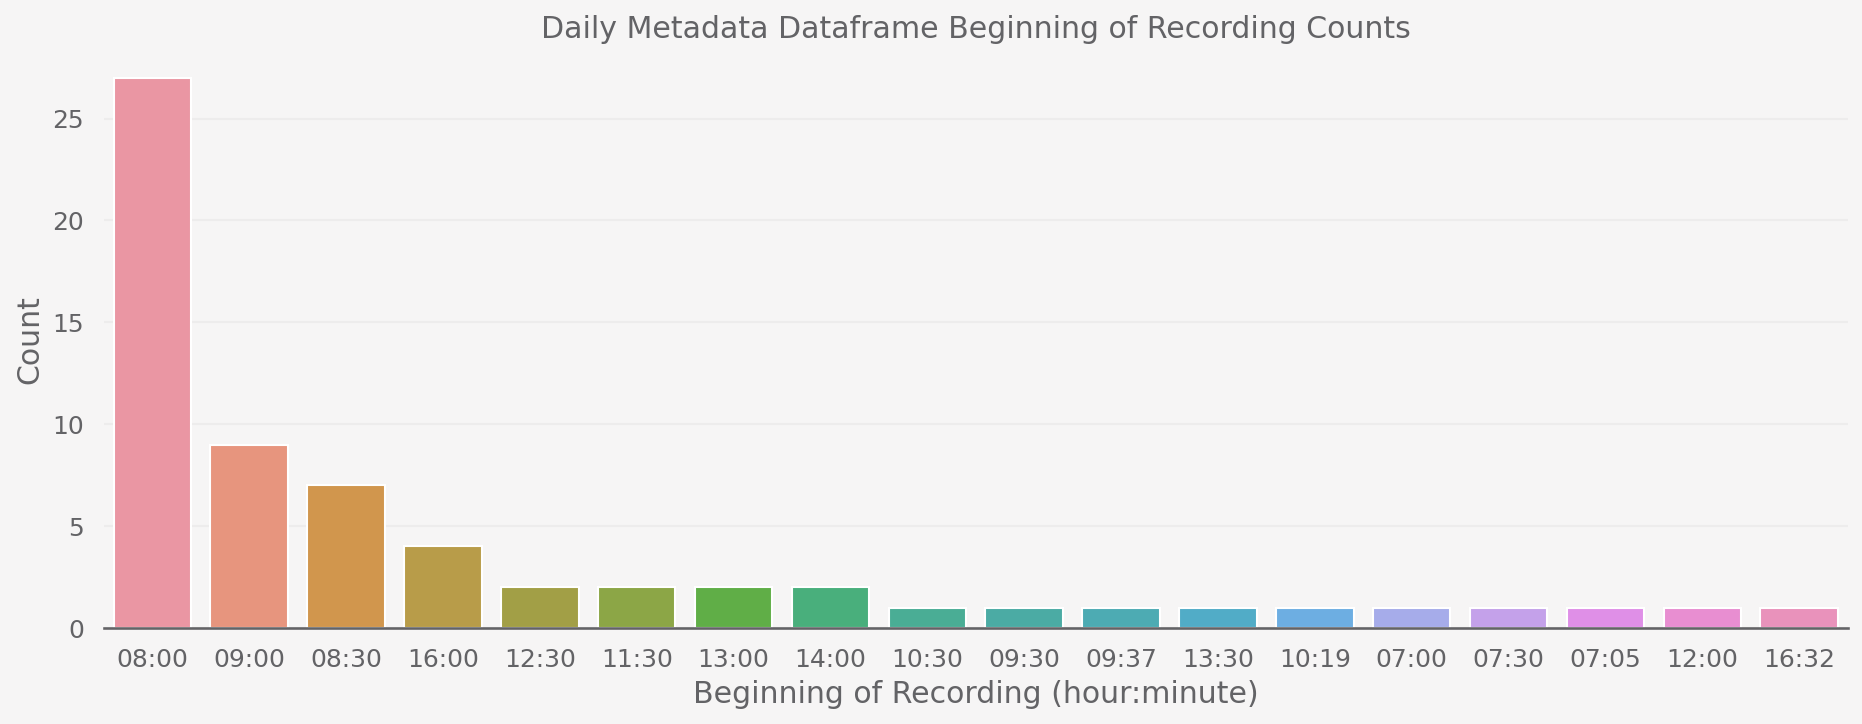

In [12]:
daily_BOR_counts = daily_metadata['Beginning of recording [00:00-23:59]'].value_counts()

plt.figure(figsize=(15, 5))

barplot = sns.barplot(x=daily_BOR_counts.index, y=daily_BOR_counts.values)

barplot.set_ylabel('Count')
barplot.set_xlabel('Beginning of Recording (hour:minute)')
barplot.set_title('Daily Metadata Dataframe Beginning of Recording Counts')

if CFG.SAVEFIG:
    plt.savefig('../data/images/daily_metadata_BOR_counts.png')
plt.show()

### Subjects

- Metadata for each Subject in the study, including their Age and Sex as well as:
  - Visit Only available for subjects in the daily and defog datasets.
  - YearsSinceDx Years since Parkinson's diagnosis.
  - UPDRSIIIOn/UPDRSIIIOff Unified Parkinson's Disease Rating Scale score during on/off medication respectively.
  - NFOGQ Self-report [FoG questionnaire score].(https://pubmed.ncbi.nlm.nih.gov/19660949/)

In [13]:
subjects = pd.read_csv(f'{CFG.DATA_PATH}/subjects.csv')

print(f'\t{gld}Shape of subjects \t --> \t {red}{subjects.shape}{res}')
display(stylize_simple(subjects.head(5), 'subjects, top 5 rows (hover to magnify)'))
display(stylize_describe(subjects, dataset_name='subjects'))

print(f'\t{gld}Number of unique subjects \t --> \t {red}{subjects["Subject"].nunique()}{res}')

subject_example = subjects.loc[subjects.sample(1).index, 'Subject'].values[0]
subject_example_df = subjects[subjects['Subject'] == subject_example]
display(stylize_simple(subject_example_df.head(10), 'top 10 rows of a singular subject ID (hover to magnify)'))

	Shape of subjects 	 --> 	 (173, 8)


,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,1.000000,63,M,3.000000,30.000000,nan,0
1,05595e,1.000000,56,M,8.000000,28.000000,nan,0
2,0967b2,1.000000,59,M,10.000000,38.000000,48.000000,19
3,0967b2,2.000000,59,M,10.000000,37.000000,44.000000,13
4,097078,nan,70,F,10.000000,27.000000,50.000000,20


,count,mean,std,min,25%,50%,75%,max,NaN count
Visit,111,1.369,0.485,1.000,1.000,1.000,2.000,2.000,62.000
Age,173,67.763,7.972,28.000,62.000,68.000,73.000,94.000,0.000
YearsSinceDx,173,10.384,6.289,0.420,6.000,9.000,15.000,30.000,0.000
UPDRSIII_On,172,34.273,12.733,5.000,25.000,35.000,42.250,79.000,1.000
UPDRSIII_Off,132,42.879,12.999,15.000,33.000,43.000,49.250,91.000,41.000
NFOGQ,173,17.121,7.575,0.000,15.000,19.000,22.000,29.000,0.000


	Number of unique subjects 	 --> 	 136


,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
139,d79889,1.000000,69,M,17.000000,24.000000,51.000000,20
140,d79889,2.000000,69,M,17.000000,34.000000,47.000000,20


#### Plots

##### Pie

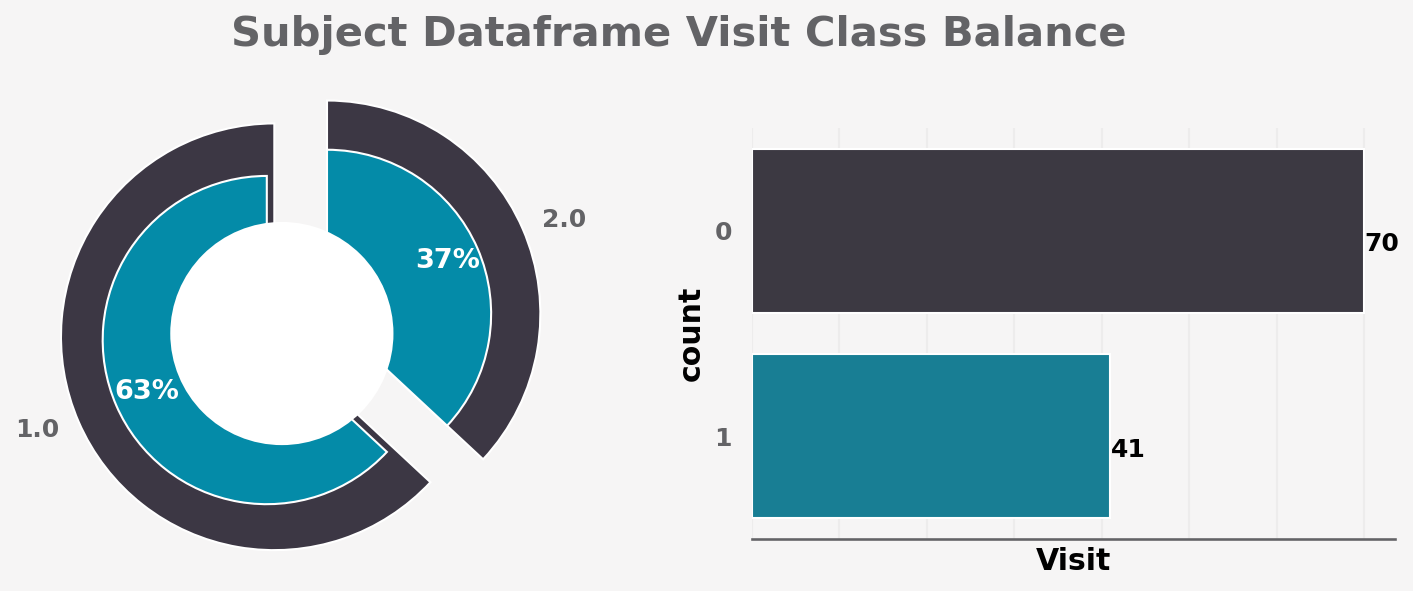

None

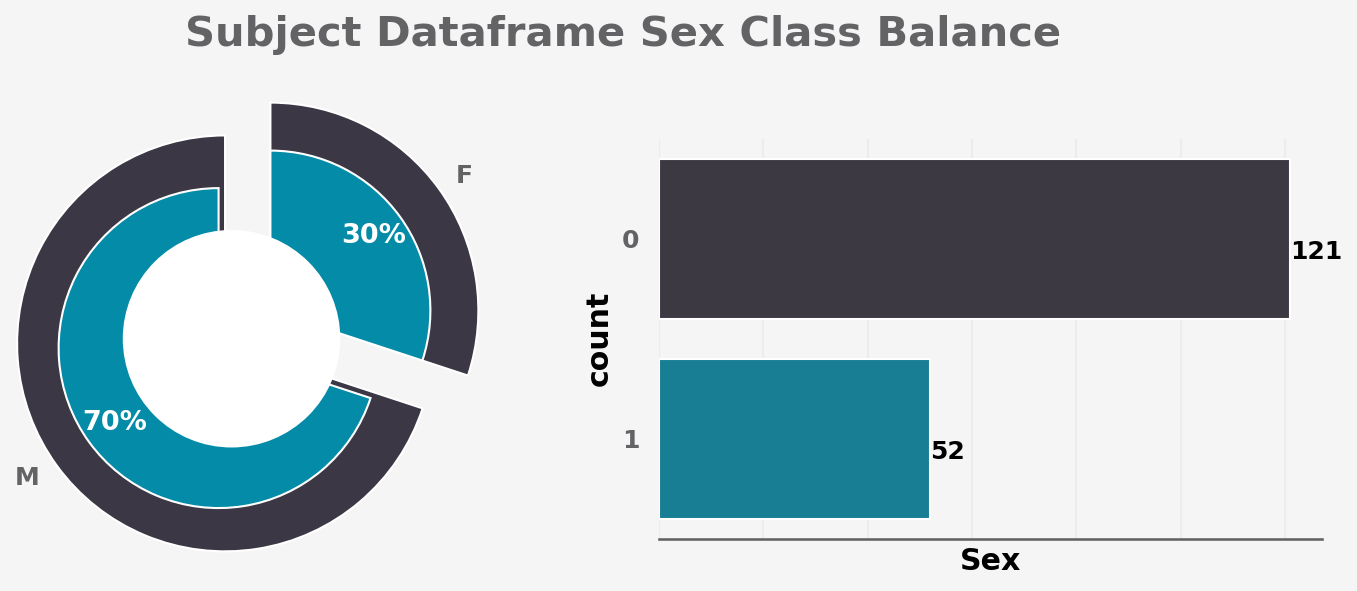

None

In [14]:
display(plot_count(subjects, 'Visit', 'Subject Dataframe Visit Class Balance', savefig=CFG.SAVEFIG))
display(plot_count(subjects, 'Sex', 'Subject Dataframe Sex Class Balance', savefig=CFG.SAVEFIG))

##### Histogram

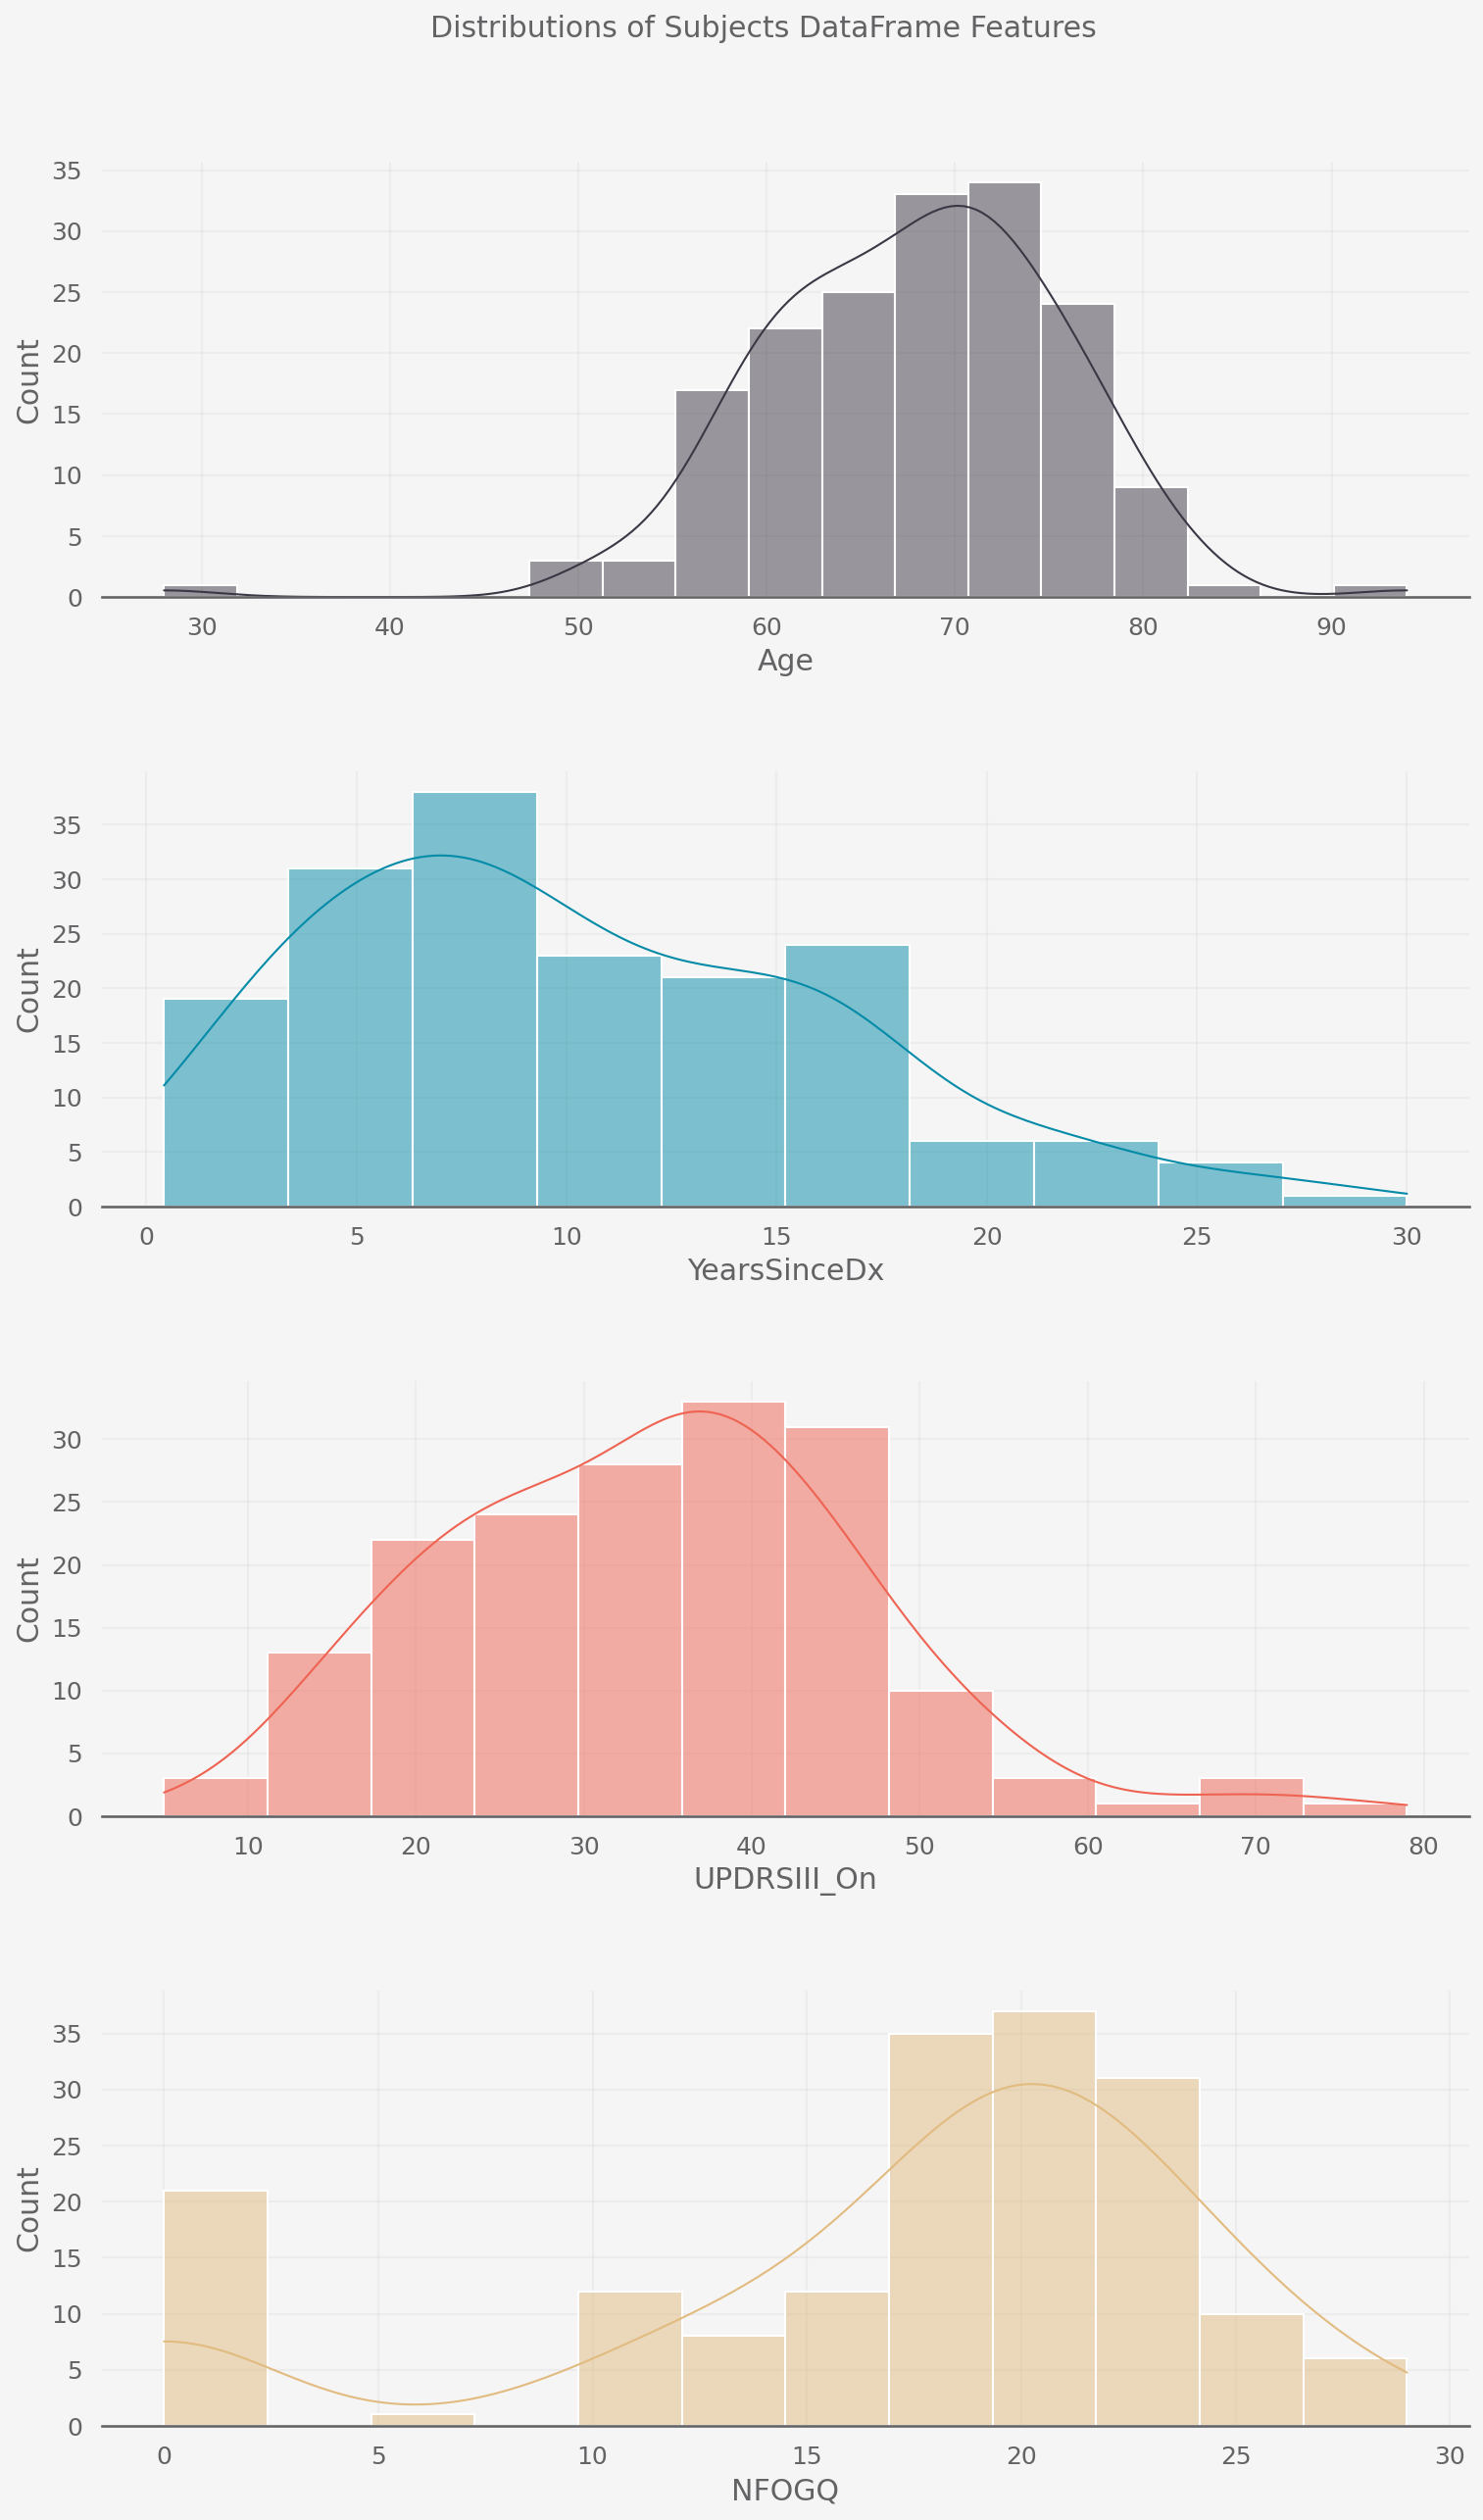

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(12, 20))
features = ['Age', 'YearsSinceDx', 'UPDRSIII_On', 'NFOGQ']

for idx, (ax, col) in enumerate(zip(axes.ravel(), features)):
    sns.histplot(subjects, x=col, ax=ax, kde=True, color=palette[idx])

plt.subplots_adjust(hspace=0.4)
plt.suptitle('Distributions of Subjects DataFrame Features', y=.93)
if CFG.SAVEFIG:
    plt.savefig('../data/images/subjects_metadata_distributions.png')
plt.show()

##### Correlation Matrix

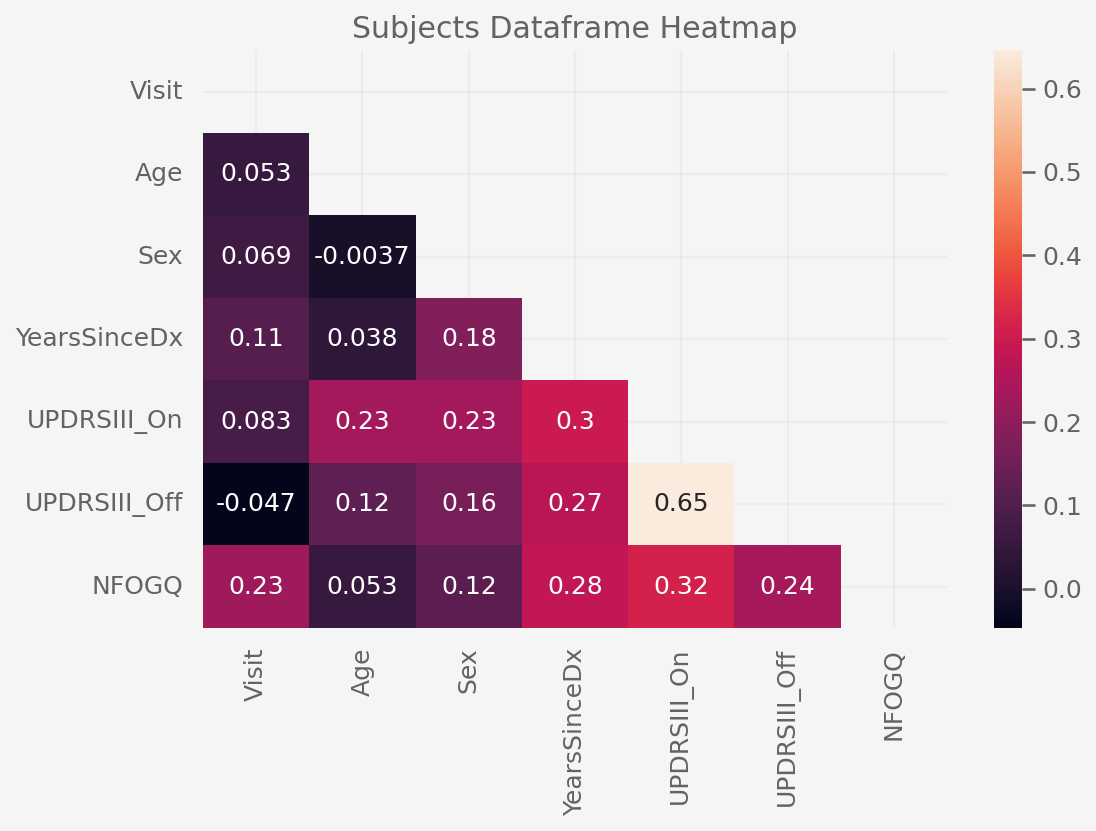

In [16]:
temp = subjects.copy()
temp['Sex'] = temp['Sex'].replace({
    'F': 0,
    'M': 1
})

corr = temp.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(8, 5))

sns.heatmap(corr, mask=mask, annot=True).set_title('Subjects Dataframe Heatmap')

if CFG.SAVEFIG:
    plt.savefig('../data/images/subjects_heatmap.png')
plt.show()

### Events

- Metadata for each FoG event in all data series. The event times agree with the labels in the data series.
  - Id The data series the event occured in.
  - Init Time (s) the event began.
  - Completion Time (s) the event ended.
  - Type Whether StartHesitation, Turn, or Walking.
  - Kinetic Whether the event was kinetic (1) and involved movement, or akinetic (0) and static.

In [24]:
events = pd.read_csv(f'{CFG.DATA_PATH}/events.csv')

print(f'\t{gld}Shape of events \t --> \t {red}{events.shape}{res}')
display(stylize_simple(events.head(5), 'events, top 5 rows (hover to magnify)'))
display(stylize_describe(events, dataset_name='events'))

print(f'\t{gld}Number of unique ids \t --> \t {red}{events["Id"].nunique()}{res}')

id_example = events.loc[events.sample(1).index, 'Id'].values[0]
id_example_df = events[events['Id'] == id_example]
display(stylize_simple(id_example_df.head(10), 'top 10 rows of a singular id (hover to magnify)'))

	Shape of events 	 --> 	 (3712, 5)


,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.613120,14.773100,Turn,1.000000
1,009ee11563,11.384700,41.184700,Turn,1.000000
2,009ee11563,54.664700,58.784700,Turn,1.000000
3,011322847a,28.096600,30.296600,Turn,1.000000
4,01d0fe7266,30.318400,31.878400,Turn,1.000000


,count,mean,std,min,25%,50%,75%,max,NaN count
Init,3712,988.179,946.081,1.020,45.019,849.585,1608.286,4425.577,0.000
Completion,3712,995.975,943.655,2.513,55.686,852.576,1611.910,4437.105,0.000
Kinetic,2669,0.812,0.391,0.000,1.000,1.000,1.000,1.000,1043.000


	Number of unique ids 	 --> 	 535


,Id,Init,Completion,Type,Kinetic
2096,4ec23c3d98,22.716000,24.073000,Walking,1.000000
2097,4ec23c3d98,24.078000,28.167000,Walking,1.000000
2098,4ec23c3d98,28.202000,28.835000,Walking,0.000000
2099,4ec23c3d98,111.363000,112.630000,Walking,1.000000
2100,4ec23c3d98,112.640000,117.700000,Walking,1.000000
2101,4ec23c3d98,267.930000,269.366000,Turn,1.000000
2102,4ec23c3d98,272.308000,272.400000,Walking,1.000000
2103,4ec23c3d98,282.708000,282.808000,Walking,1.000000
2104,4ec23c3d98,308.536000,309.843000,Turn,1.000000
2105,4ec23c3d98,309.847000,314.927000,Turn,1.000000


#### Plots

##### Pie Chart

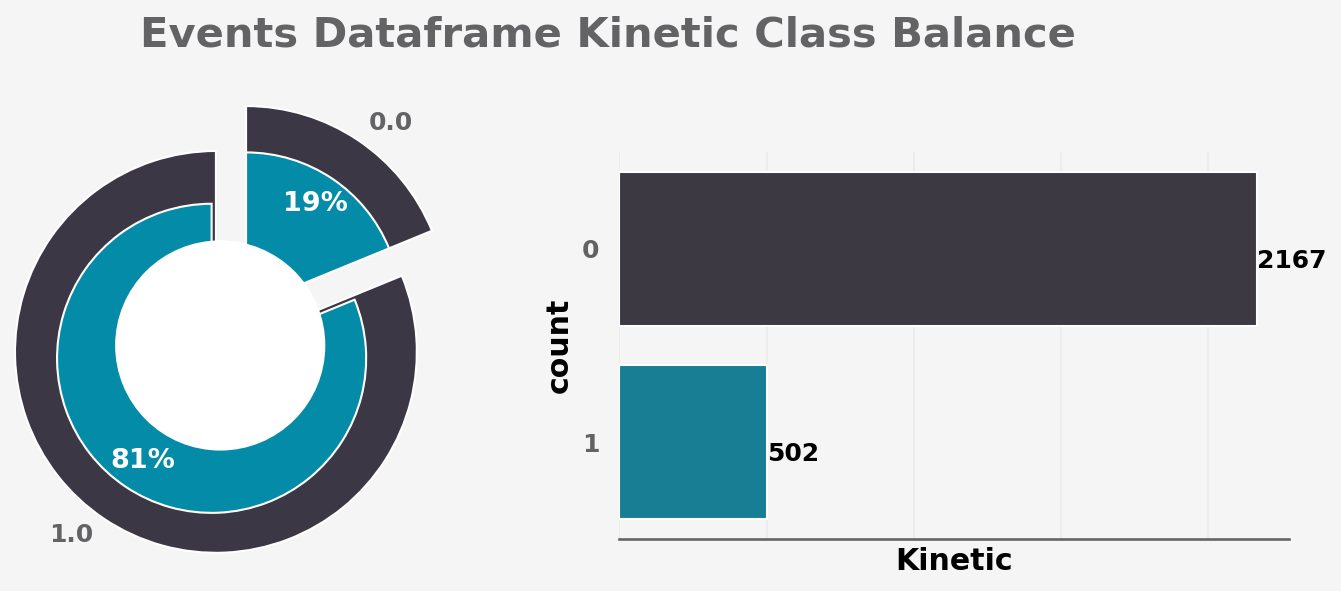

In [18]:
plot_count(events, 'Kinetic', 'Events Dataframe Kinetic Class Balance', savefig=CFG.SAVEFIG)

##### Bar Plot

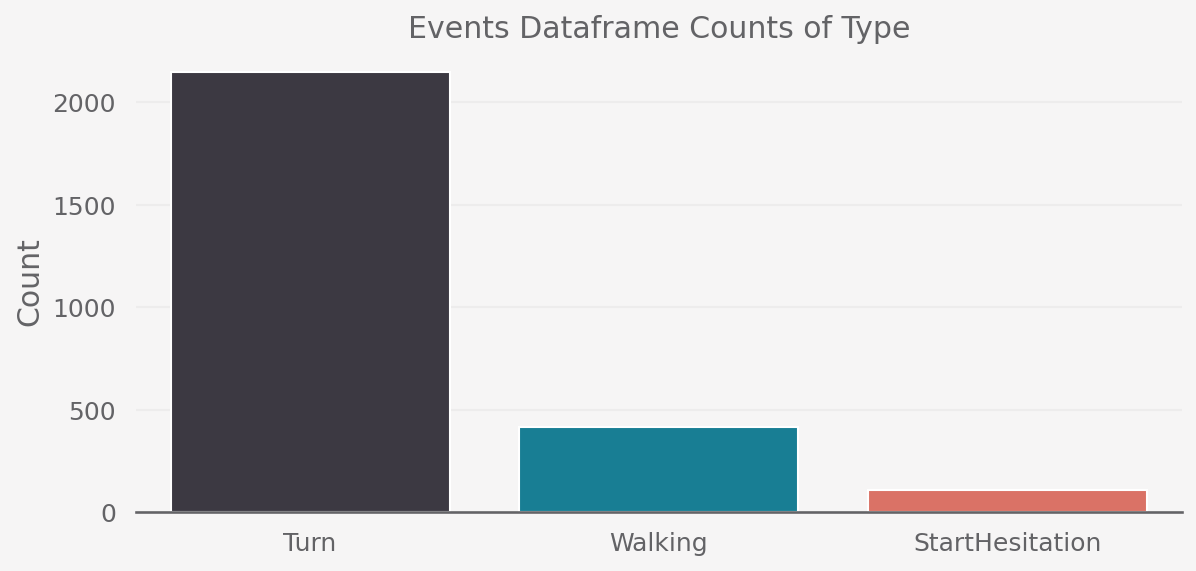

In [19]:
events_type_counts = events['Type'].value_counts()

plt.figure(figsize=(9, 4))

barplot = sns.barplot(x=events_type_counts.index, y=events_type_counts.values)
barplot.set_ylabel('Count')
barplot.set_title('Events Dataframe Counts of Type')

if CFG.SAVEFIG:
    plt.savefig('../data/images/events_metadata_type_counts.png')
plt.show()

##### Histograms

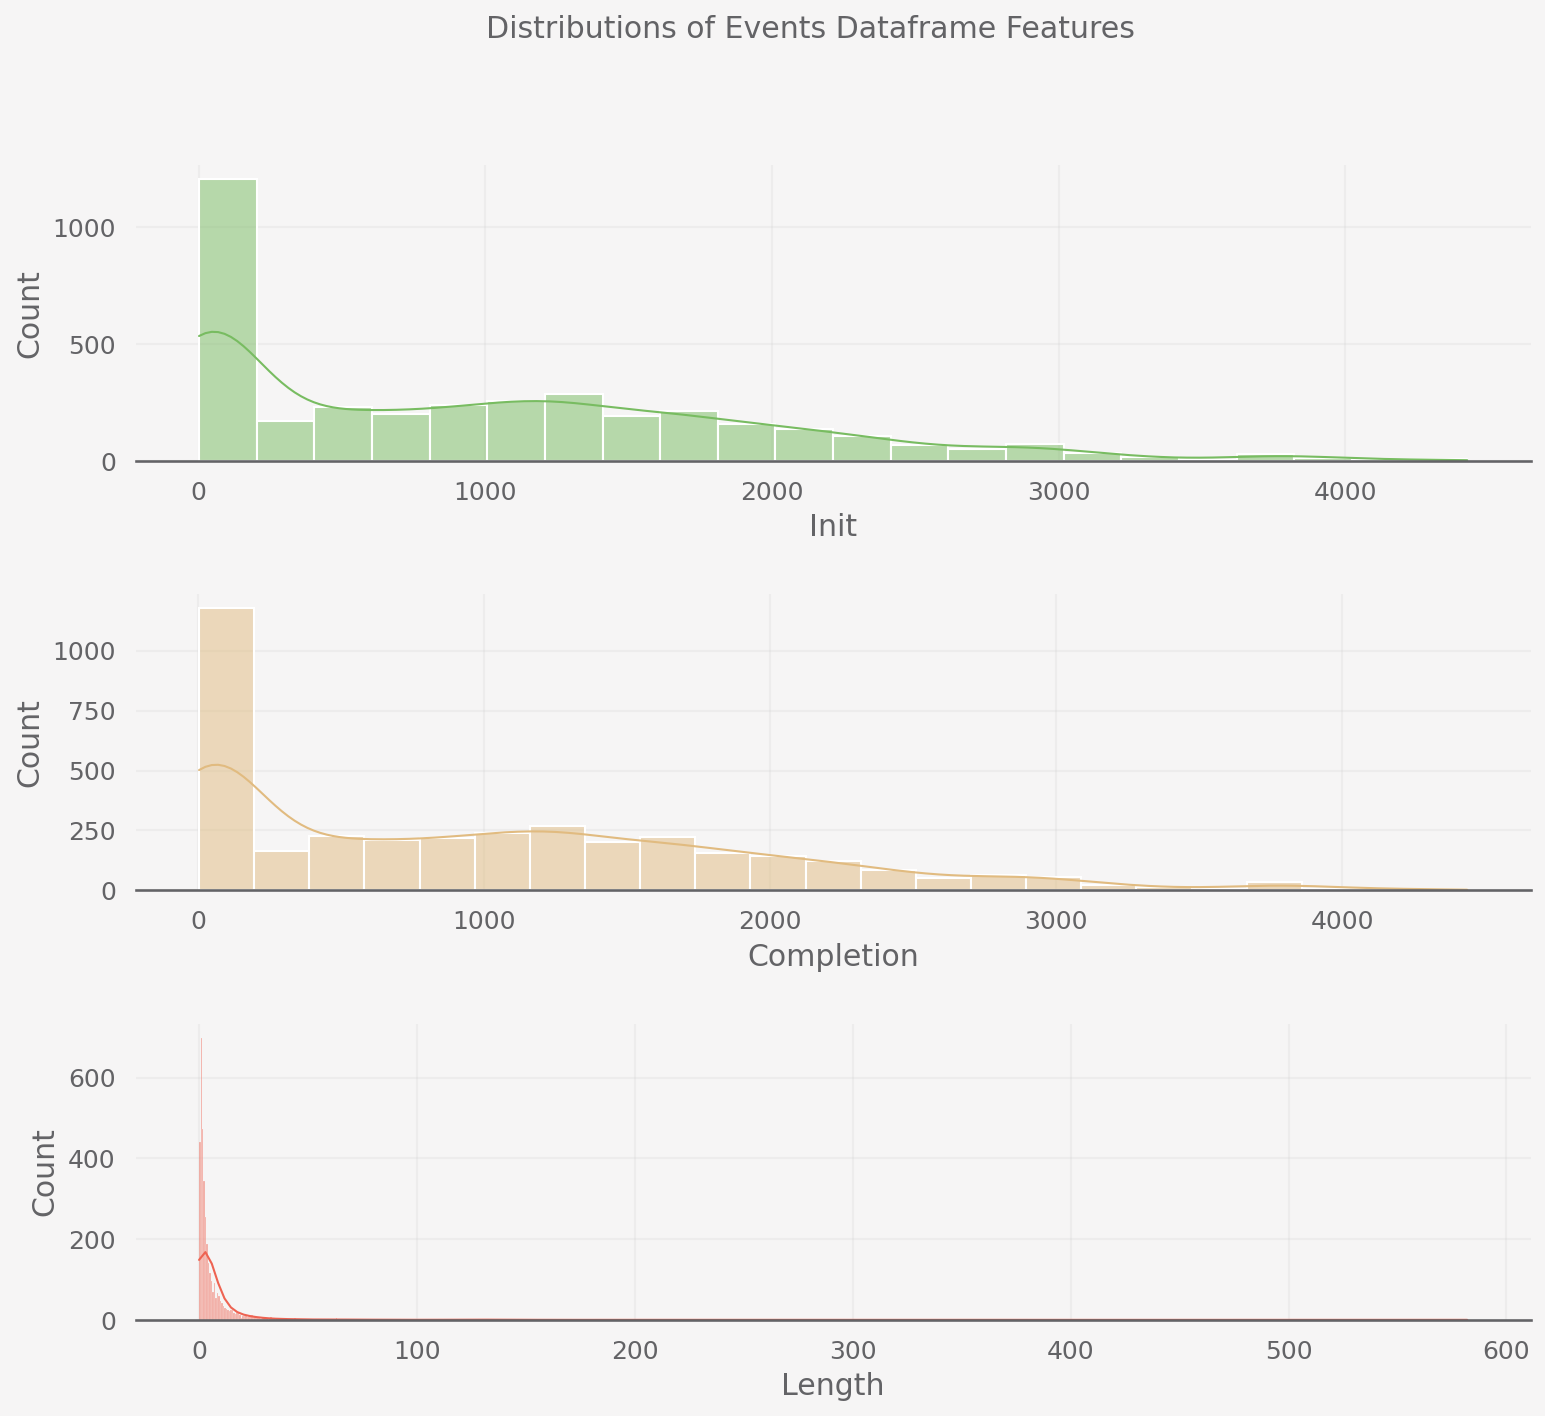

In [ ]:
events['Length'] = events['Completion'] - events['Init']
features = ['Init', 'Completion', 'Length']

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

for idx, (ax, col) in enumerate(zip(axes.ravel(), features), start=1):
    sns.histplot(events, x=col, ax=ax, kde=True, color=palette[len(palette)-idx])

plt.subplots_adjust(hspace=0.45)
plt.suptitle('Distributions of Events Dataframe Features')
if CFG.SAVEFIG:
    plt.savefig('../data/images/events_metadata_distributions.png')
plt.show()

##### Correlation Matrix

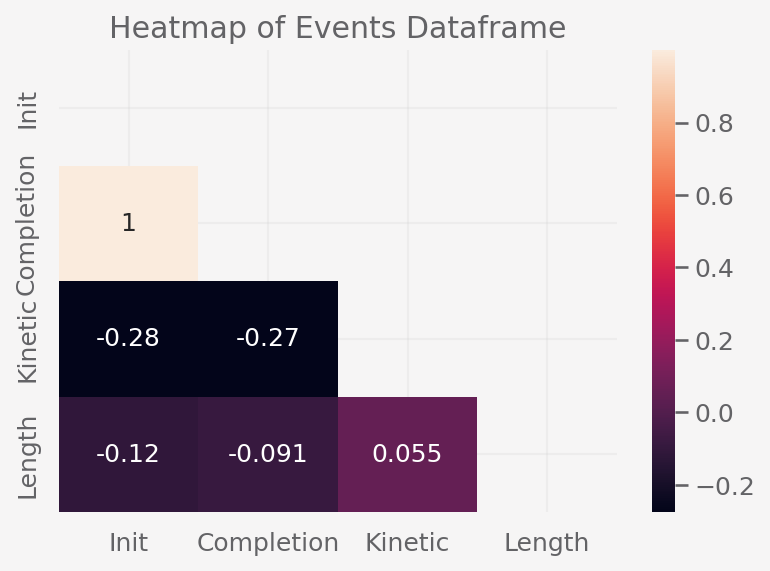

In [ ]:
corr = events.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(6, 4))

sns.heatmap(corr, mask=mask, annot=True).set_title('Heatmap of Events Dataframe')

if CFG.SAVEFIG:
    plt.savefig('../data/images/events_metadata_heatmap.png')
plt.show()

### Tasks

- Task metadata for series in the defog dataset. (Not relevant for the series in the fog or daily datasets.)
  - Id The data series where the task was measured.
  - Begin Time (s) the task began.
  - End Time (s) the task ended.
  - Task One of seven tasks types in the DeFOG protocol, described on this page.

In [25]:
tasks = pd.read_csv(f'{CFG.DATA_PATH}/tasks.csv')

print(f'\t{gld}Shape of tasks \t --> \t {red}{tasks.shape}{res}')
display(stylize_simple(tasks.head(5), 'tasks, top 5 rows (hover to magnify)'))
display(stylize_describe(tasks, dataset_name='tasks'))

print(f'\t{gld}Number of unique ids \t --> \t {red}{tasks["Id"].nunique()}{res}')

id_example = tasks.loc[tasks.sample(1).index, 'Id'].values[0]
id_example_df = tasks[tasks['Id'] == id_example]
display(stylize_simple(id_example_df.head(10), 'top 10 rows of a singular id (hover to magnify)'))

	Shape of tasks 	 --> 	 (2817, 4)


,Id,Begin,End,Task
0,02ab235146,10.000000,190.480000,Rest1
1,02ab235146,211.240000,271.560000,Rest2
2,02ab235146,505.880000,522.400000,4MW
3,02ab235146,577.960000,594.640000,4MW-C
4,02ab235146,701.320000,715.280000,MB1


,count,mean,std,min,25%,50%,75%,max,NaN count
Begin,2817,864.281,657.882,10.000,341.990,742.466,1230.840,4320.800,0.000
End,2817,891.158,665.440,10.003,360.209,762.440,1260.440,4424.960,0.000


	Number of unique ids 	 --> 	 137


,Id,Begin,End,Task
310,2054f1d5df,10.000000,66.680000,4MW
311,2054f1d5df,152.600000,219.200000,4MW-C
312,2054f1d5df,355.679000,435.880000,TUG-ST
313,2054f1d5df,461.600000,545.360000,TUG-ST
314,2054f1d5df,645.600000,691.400000,TUG-DT
315,2054f1d5df,719.560000,769.360000,TUG-DT
316,2054f1d5df,825.640000,909.480000,TUG-C
317,2054f1d5df,929.263000,984.080000,TUG-C
318,2054f1d5df,1110.960000,1209.400000,Turning-ST
319,2054f1d5df,1305.173000,1386.440000,Turning-DT


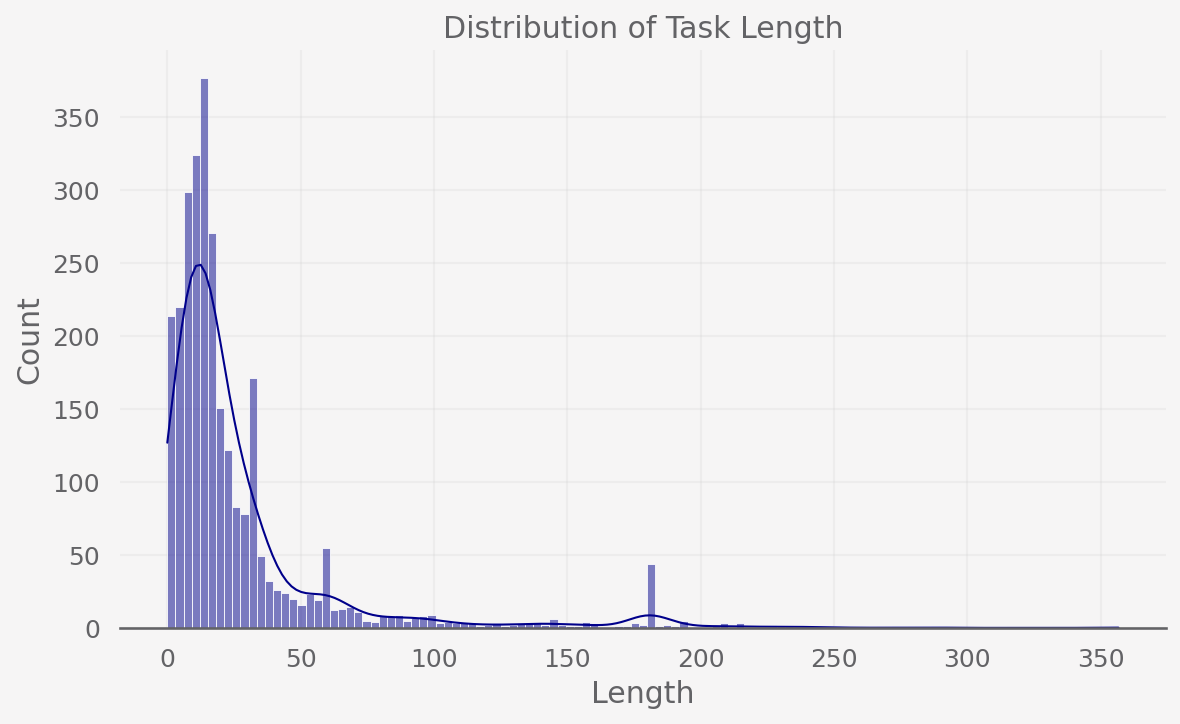

In [ ]:
tasks['Length'] = tasks['End'] - tasks['Begin']

plt.figure(figsize=(9, 5))

length = sns.histplot(tasks, x='Length', kde=True, color='darkblue')
length.set_title('Distribution of Task Length')

if CFG.SAVEFIG:
    plt.savefig('../data/images/tasks_metadata_distributions.png')
plt.show()

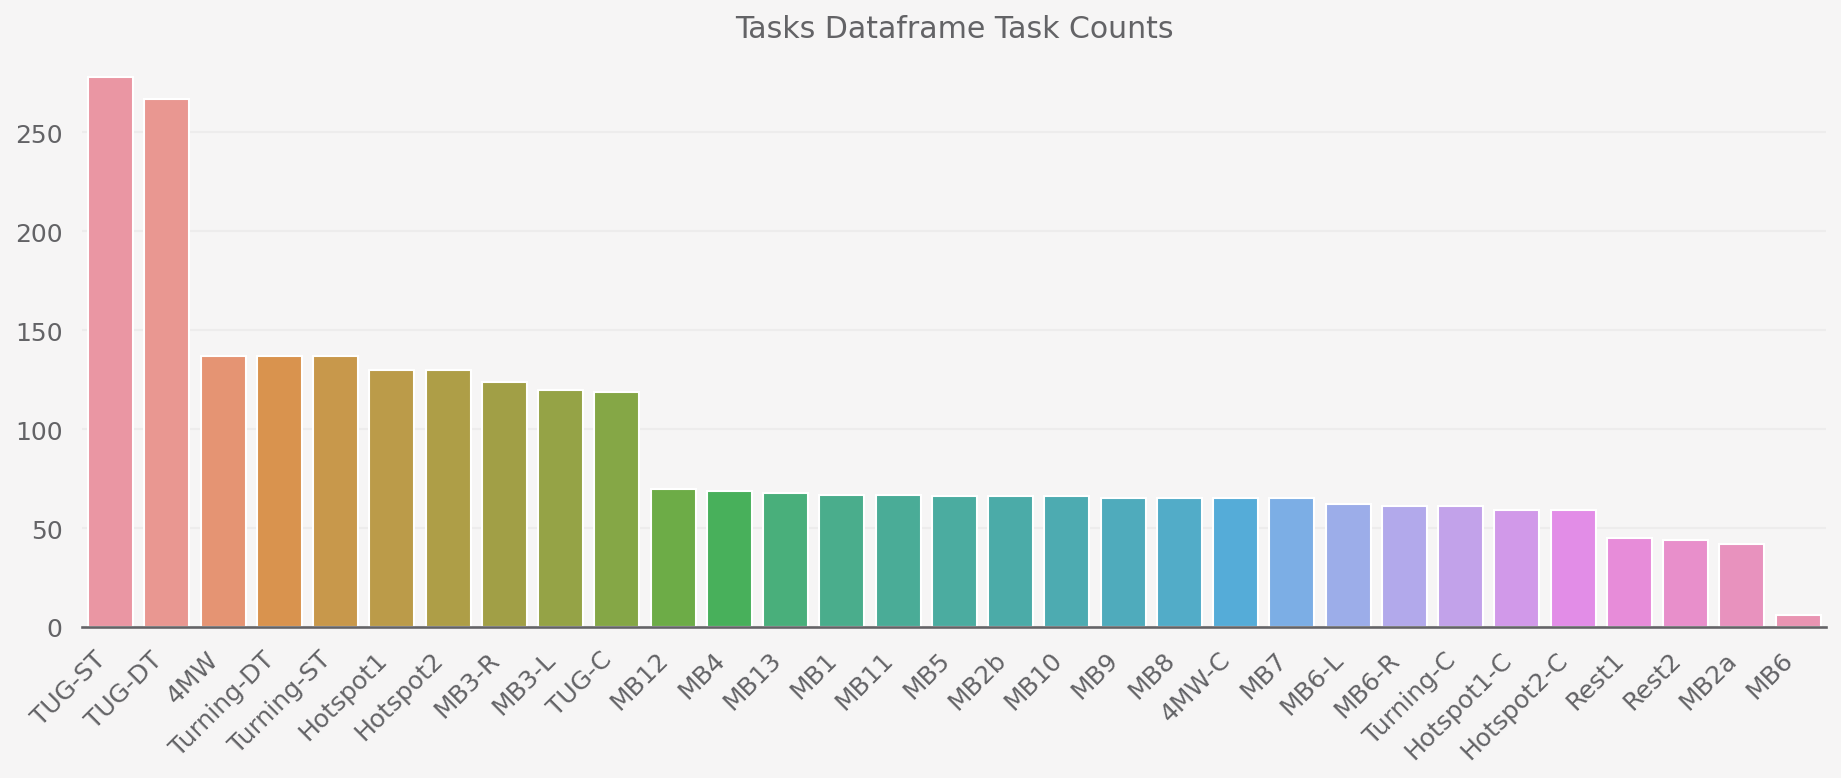

In [ ]:
task_counts = tasks['Task'].value_counts()

plt.figure(figsize=(15, 5))

sns.barplot(x=task_counts.index, y=task_counts.values).set_title('Tasks Dataframe Task Counts')
plt.xticks(rotation=45, ha='right')

if CFG.SAVEFIG:
    plt.savefig('../data/images/tasks_metadata_task_counts.png')
plt.show()

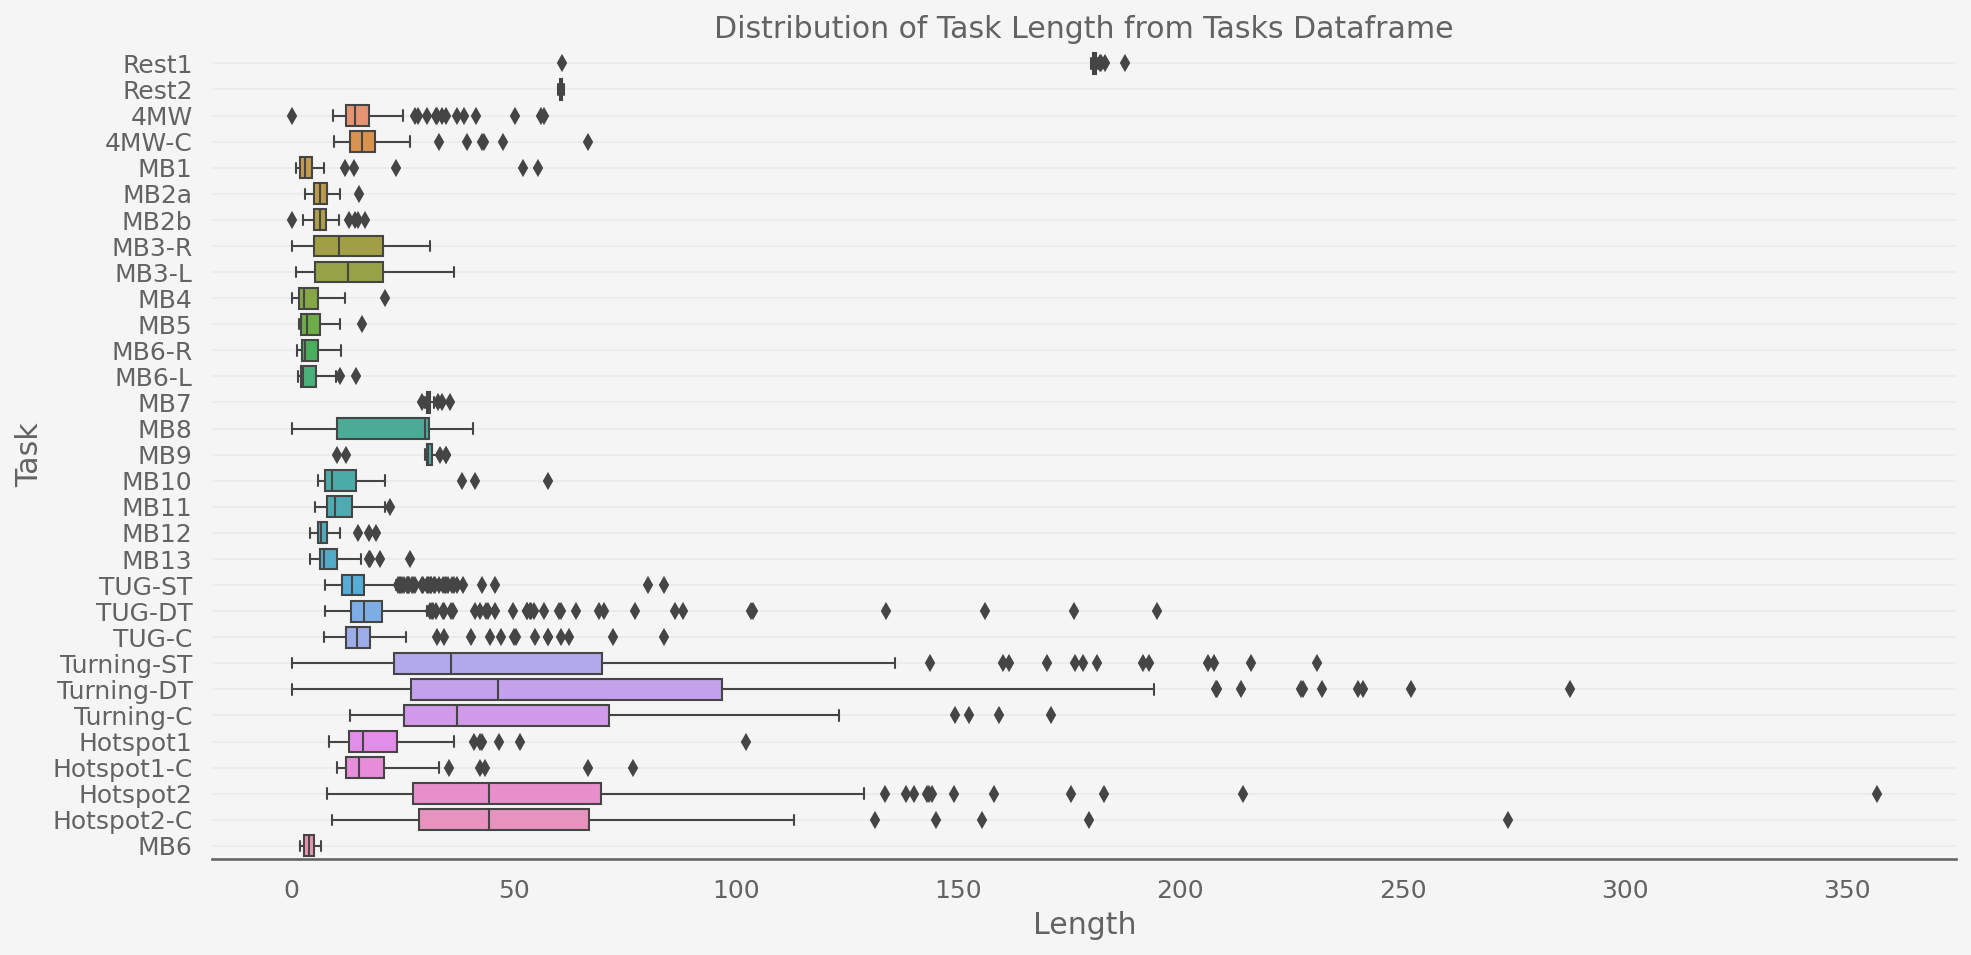

In [ ]:
plt.figure(figsize=(15, 7))

boxplot = sns.boxplot(tasks, x='Length', y='Task')
boxplot.set_title('Distribution of Task Length from Tasks Dataframe')

plt.grid()
if CFG.SAVEFIG:
    plt.savefig('../data/images/tasks_metadata_boxplot.png')
plt.show()